<a href="https://colab.research.google.com/github/ArjunKSoni/AyurmedicModel/blob/main/Ayurmedic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [3]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [7]:
from google.colab import files
uploaded=files.upload()

Saving ayurvedic medicines for different diseases.xlsx to ayurvedic medicines for different diseases.xlsx


In [8]:
df=pd.read_excel('ayurvedic medicines for different diseases.xlsx')

In [9]:
df.head()

,Medicine Name,Symptoms,Main Ingredients,Commonly Used for Diseases,Alternate Allopathic Drug Name,Advantages Over Allopathic Drugs,Home Remedies,Dosage,Diet Chart,Yoga Names
0,Brahmi,"Memory Enhancement, Cognitive Function ...",Brahmi (Bacopa monnieri) leaves/extract,"Memory, Cognitive Health","Nootropics, Memory Enhancers","Herbal, No Side Effects","Yoga, Meditation, Brain-Boosting Foods ...",300-500 mg daily,"Balanced diet with fish, leafy greens, and nu...","Bhramari Pranayama, Sarvangasana (Shoulder St..."
1,Turmeric,"Joint Pain, Inflammation, Digestive Aid ...",Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath ...",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory...","Surya Namaskar (Sun Salutation), Trikonasana ..."
2,Amla (Indian Gooseberry),"Hair Health, Digestive Health, Immunity ...",Amla (Emblica officinalis) fruit/extract,"Hair Health, Immunity","Hair Supplements, Immune Boosters","Herbal, Nutrient-Rich","Aloe Vera Gel for Skin, Honey and Lemon for D...",500-1000 mg daily,"Incorporate amla in salads, smoothies, and sn...","Kapalbhati Pranayama, Halasana (Plow Pose) ..."
3,Shatavari,"Hormonal Balance, Reproductive Health ...",Shatavari (Asparagus racemosus) root/extract,"Hormonal Balance, Fertility",Hormone Replacement Therapy,"Herbal, Natural Hormone Support","Yoga, Meditation, Hormone-Balancing Diet ...",500-1000 mg daily,"Include shatavari in soups, teas, and asparag...","Bhujangasana (Cobra Pose), Viparita Karani (L..."
4,Haritaki,"Detoxification, Digestive Health ...",Haritaki (Terminalia chebula) fruit/extract,"Digestive Health, Detox","Laxatives, Detox Supplements","Herbal, Non-Habit Forming","Fasting, Warm Water with Lemon, Fiber-Rich Fo...",500-1000 mg daily,Increase fiber intake with fruits and vegetab...,"Paschimottanasana (Seated Forward Bend), Agni..."


In [10]:
k=df.columns
k

Index([' Medicine Name             ',
       ' Symptoms                                         ',
       ' Main Ingredients                           ',
       ' Commonly Used for Diseases      ', ' Alternate Allopathic Drug Name ',
       ' Advantages Over Allopathic Drugs ',
       ' Home Remedies                                      ',
       ' Dosage                    ',
       ' Diet Chart                                            ',
       ' Yoga Names                                             '],
      dtype='object')

In [11]:
for i in k:
  df.rename(columns = {i:i.strip()}, inplace = True)

In [12]:
col=df.columns
col

Index(['Medicine Name', 'Symptoms', 'Main Ingredients',
       'Commonly Used for Diseases', 'Alternate Allopathic Drug Name',
       'Advantages Over Allopathic Drugs', 'Home Remedies', 'Dosage',
       'Diet Chart', 'Yoga Names'],
      dtype='object')

In [13]:
df['Symptoms'] = df['Symptoms'].str.split(',')

In [ ]:
df = df.explode('Symptoms')
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

In [ ]:
df['Commonly Used for Diseases'] = df['Commonly Used for Diseases'].str.split(',')
df = df.explode('Commonly Used for Diseases')
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,Medicine Name,Symptoms,Main Ingredients,Commonly Used for Diseases,Alternate Allopathic Drug Name,Advantages Over Allopathic Drugs,Home Remedies,Dosage,Diet Chart,Yoga Names
0,Brahmi,Memory Enhancement,Brahmi (Bacopa monnieri) leaves/extract,"Memory, Cognitive Health","Nootropics, Memory Enhancers","Herbal, No Side Effects","Yoga, Meditation, Brain-Boosting Foods ...",300-500 mg daily,"Balanced diet with fish, leafy greens, and nu...","Bhramari Pranayama, Sarvangasana (Shoulder St..."
1,Brahmi,Cognitive Function,Brahmi (Bacopa monnieri) leaves/extract,"Memory, Cognitive Health","Nootropics, Memory Enhancers","Herbal, No Side Effects","Yoga, Meditation, Brain-Boosting Foods ...",300-500 mg daily,"Balanced diet with fish, leafy greens, and nu...","Bhramari Pranayama, Sarvangasana (Shoulder St..."
2,Turmeric,Joint Pain,Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath ...",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory...","Surya Namaskar (Sun Salutation), Trikonasana ..."
3,Turmeric,Inflammation,Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath ...",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory...","Surya Namaskar (Sun Salutation), Trikonasana ..."
4,Turmeric,Digestive Aid,Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath ...",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory...","Surya Namaskar (Sun Salutation), Trikonasana ..."


In [17]:
# df.to_csv('ayurmedicUpdated.csv', index=False)

In [18]:
df['Symptoms'].unique()

array([' Memory Enhancement', ' Cognitive Function            ',
       ' Joint Pain', ' Inflammation', ' Digestive Aid           ',
       ' Hair Health', ' Digestive Health', ' Immunity          ',
       ' Hormonal Balance', ' Reproductive Health            ',
       ' Detoxification', ' Digestive Health                 ',
       ' Hair Loss', ' Scalp Health                          ',
       ' Heart Health', ' Blood Pressure                     ',
       ' Cholesterol Management', ' Weight Loss              ',
       ' Skin Detoxification', ' Blood Purification          ',
       ' Anxiety Relief              ', ' Skin Care',
       ' Aromatherapy                          ', ' Liver Detoxification',
       ' Digestive Health           ', ' Antioxidant                    ',
       ' Kidney Health', ' Fluid Retention                   ',
       ' Muscle Pain                          ', ' Digestive Aid',
       ' Gas Relief                        ', ' Indigestion',
       ' Bloating  

In [19]:
df.isna().sum()

Medicine Name                       0
Symptoms                            0
Main Ingredients                    0
Commonly Used for Diseases          0
Alternate Allopathic Drug Name      0
Advantages Over Allopathic Drugs    0
Home Remedies                       0
Dosage                              0
Diet Chart                          2
Yoga Names                          4
dtype: int64

In [20]:
df.fillna("Not Found",inplace=True)

In [21]:
df.isna().sum()

Medicine Name                       0
Symptoms                            0
Main Ingredients                    0
Commonly Used for Diseases          0
Alternate Allopathic Drug Name      0
Advantages Over Allopathic Drugs    0
Home Remedies                       0
Dosage                              0
Diet Chart                          0
Yoga Names                          0
dtype: int64

In [22]:
k=[]
for i in col:
  df[i]=df[i].str.strip()


In [23]:
k=df['Symptoms'].unique()
k

array(['Memory Enhancement', 'Cognitive Function', 'Joint Pain',
       'Inflammation', 'Digestive Aid', 'Hair Health', 'Digestive Health',
       'Immunity', 'Hormonal Balance', 'Reproductive Health',
       'Detoxification', 'Hair Loss', 'Scalp Health', 'Heart Health',
       'Blood Pressure', 'Cholesterol Management', 'Weight Loss',
       'Skin Detoxification', 'Blood Purification', 'Anxiety Relief',
       'Skin Care', 'Aromatherapy', 'Liver Detoxification', 'Antioxidant',
       'Kidney Health', 'Fluid Retention', 'Muscle Pain', 'Gas Relief',
       'Indigestion', 'Bloating', 'Libido Enhancement', 'Mood Support',
       'Immune Booster', 'Fever', 'Stress Relief', 'Energy',
       'Skin Health', 'Immune Support', 'Respiratory Health',
       'Colon Cleansing', 'Weight Management', 'Cough', 'Sore Throat',
       'Gastric Ulcers', 'Stamina', 'Anti-Aging', 'Vitality', 'Strength',
       'Diarrhea', 'Skin Healing', 'Scalp Care', 'Cholesterol Control',
       'Liver Health', 'Metabolis

In [24]:
len(k)

61

In [25]:
le=LabelEncoder()

In [26]:
df.head()

,Medicine Name,Symptoms,Main Ingredients,Commonly Used for Diseases,Alternate Allopathic Drug Name,Advantages Over Allopathic Drugs,Home Remedies,Dosage,Diet Chart,Yoga Names
0,Brahmi,Memory Enhancement,Brahmi (Bacopa monnieri) leaves/extract,"Memory, Cognitive Health","Nootropics, Memory Enhancers","Herbal, No Side Effects","Yoga, Meditation, Brain-Boosting Foods",300-500 mg daily,"Balanced diet with fish, leafy greens, and nuts","Bhramari Pranayama, Sarvangasana (Shoulder Stand)"
1,Brahmi,Cognitive Function,Brahmi (Bacopa monnieri) leaves/extract,"Memory, Cognitive Health","Nootropics, Memory Enhancers","Herbal, No Side Effects","Yoga, Meditation, Brain-Boosting Foods",300-500 mg daily,"Balanced diet with fish, leafy greens, and nuts","Bhramari Pranayama, Sarvangasana (Shoulder Stand)"
2,Turmeric,Joint Pain,Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory ...","Surya Namaskar (Sun Salutation), Trikonasana (..."
3,Turmeric,Inflammation,Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory ...","Surya Namaskar (Sun Salutation), Trikonasana (..."
4,Turmeric,Digestive Aid,Turmeric (Curcuma longa) rhizome/extract,"Inflammation, Digestion","NSAIDs, Digestive Medications","Natural, Anti-Inflammatory","Hot Compress, Ginger Tea, Epsom Salt Bath",500-2000 mg daily,"Turmeric milk, curries, and anti-inflammatory ...","Surya Namaskar (Sun Salutation), Trikonasana (..."


In [27]:
d={}
for i in col:
  df[i]=le.fit_transform(df[i]);
  inverse=le.inverse_transform(df[i])
  d[i]=inverse

In [28]:
df.head()

,Medicine Name,Symptoms,Main Ingredients,Commonly Used for Diseases,Alternate Allopathic Drug Name,Advantages Over Allopathic Drugs,Home Remedies,Dosage,Diet Chart,Yoga Names
0,16,39,18,35,38,18,58,5,5,10
1,16,11,18,35,38,18,58,5,5,10
2,56,34,61,26,35,28,31,10,47,37
3,56,32,61,26,35,28,31,10,47,37
4,56,16,61,26,35,28,31,10,47,37


In [29]:
di={}
for i in range(len(df['Alternate Allopathic Drug Name'])):
  di[df['Alternate Allopathic Drug Name'][i]]=d['Alternate Allopathic Drug Name'][i];


In [30]:
df['Alternate Allopathic Drug Name'][0]

38

In [31]:
di

{38: 'Nootropics, Memory Enhancers',
 35: 'NSAIDs, Digestive Medications',
 22: 'Hair Supplements, Immune Boosters',
 24: 'Hormone Replacement Therapy',
 30: 'Laxatives, Detox Supplements',
 34: 'Minoxidil, Scalp Treatments',
 7: 'Beta-Blockers, ACE Inhibitors',
 41: 'Statins, Weight Loss Medications',
 8: 'Blood Cleansers, Skin Detox',
 20: 'Ginkgo Biloba, SSRIs',
 39: 'Skin Creams, Aromatherapy Oils',
 33: 'Liver Supplements, Digestive Aids',
 14: 'Digestive Enzymes, Antioxidants',
 15: 'Diuretics, Kidney Supplements',
 42: 'Topical Analgesics, Muscle Rubs',
 19: 'Gas Relief Medications',
 1: 'Antacids, Digestive Aids',
 18: 'Erectile Dysfunction Medications',
 4: 'Antipyretics, Immune Boosters',
 5: 'Anxiolytics, Stimulants',
 2: 'Antibiotics, Skin Creams',
 11: 'Cough Syrups, Anxiolytics',
 29: 'Laxatives, Colon Cleansers',
 27: 'Immune Boosters, Energy Supplements',
 44: 'Weight Loss Supplements, Digestive Aids',
 12: 'Cough Syrups, Digestive Aids',
 10: 'Cough Syrups, Antacids',


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
X=df[['Symptoms']]
Y=df[['Medicine Name','Main Ingredients','Commonly Used for Diseases','Alternate Allopathic Drug Name','Home Remedies','Dosage','Diet Chart','Yoga Names']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100))

In [36]:
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [37]:
predictions = model.predict(X_test)
model.predict([[11]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

array([16.41160134, 17.97317166, 35.        , 28.28698984, 50.25112706,
        5.        ,  6.58229978, 10.        ])

In [38]:
# ina=['Medicine Name','Main Ingredients','Commonly Used for Diseases','Alternate Allopathic Drug Name','Home Remedies','Dosage','Diet Chart','Yoga Names']
# for i in ina:
#   print(di[i])

In [39]:
import pickle

In [40]:
pickle.dump(model,open('Ayurvedic.pkl','wb'))

In [41]:
k=pickle.load(open('Ayurvedic.pkl','rb'))

In [42]:
k.predict([[11]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

array([[16.41160134, 17.97317166, 35.        , 28.28698984, 50.25112706,
         5.        ,  6.58229978, 10.        ]])

In [43]:
import joblib
joblib.dump(model, 'Ayurvedic2.pkl')
loaded_model = joblib.load('Ayurvedic2.pkl')

In [44]:
loaded_model.predict([[11]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

array([[16.41160134, 17.97317166, 35.        , 28.28698984, 50.25112706,
         5.        ,  6.58229978, 10.        ]])

In [45]:
correlation=df.corr()

<Axes: >

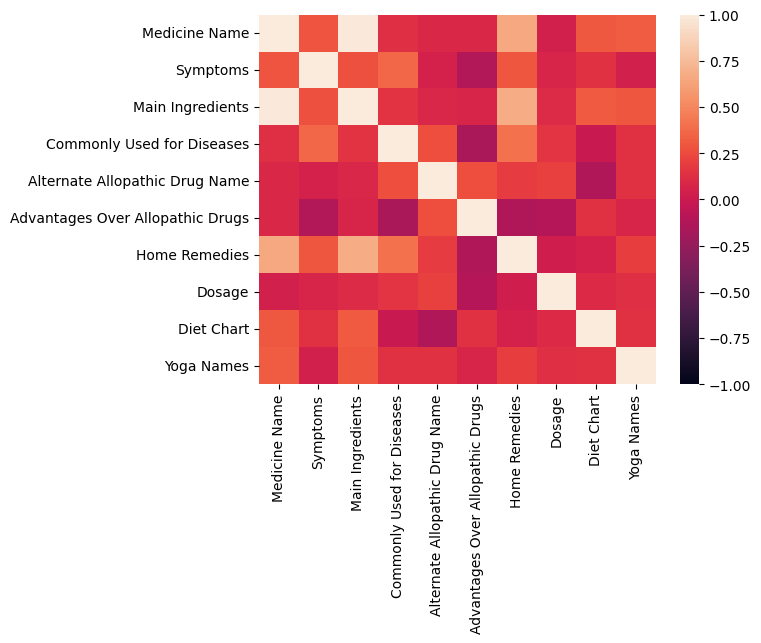

In [47]:
import seaborn as sn
sn.heatmap(correlation,vmin=-1,vmax=1)

<Axes: ylabel='Count'>

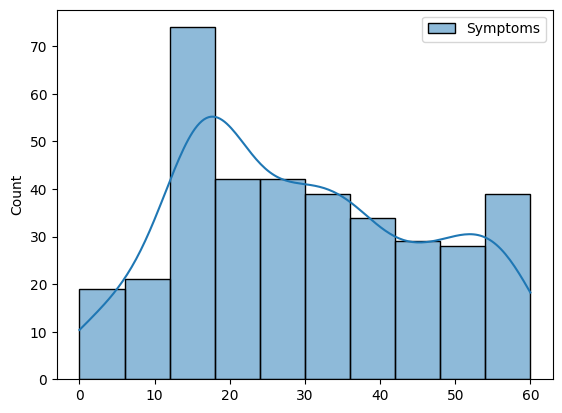

In [58]:
sn.histplot(X, kde=True, color="m")